# Analysis of Critical Aggregation Concentration of Kinase Inhibitors by DLS

### Ligand
- Ponatinib (Rows A and B)
- Ponatinib (Rows C and D)
- Ponatinib (Rows E and F)
- Ponatinib (Rows G and H)
- Ponatinib (Rows A and B)

### Titration 
- 24 point, linear titration
- titration range 1 uM - 80 uM (A1 highest conc, A24 lowest conc)

In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.size': 14})

In [2]:
def extract_normalized_intensity(DLS_data, well_dictionary, ligand = "bosutinib", number_of_sections = 2 , number_of_wells_in_each_section = 12):
    """
    For specified ligand, returns a numpy array of normalized intensity values 
    where replicates are concatanated after each other.
    """
    ALPHABET = string.ascii_uppercase

    # construct a dictionary that keeps well labels for each replicate keeping experimental order
    
    section_well_labels = {}

    for i in range(number_of_sections):

        well_interval = ligands[ligand][i]
        print(well_interval)
        first_well, last_well = well_interval.split("-")
        #print(first_well, last_well)

        # determine if well series in each section was positioned horizontally or vertically
        if first_well[0:1] == last_well[0:1]:
            print("Section {} is placed horizontally".format(i+1))
            row_name = first_well[0:1]

            well_name_list = []
            for j in range(number_of_wells_in_each_section):
                well_label = row_name + str(j+1)
                well_name_list.append(well_label)
            #print(well_name_list)
            section_well_labels["sec{}".format(i+1)] = well_name_list
            #print('section_well_labels', section_well_labels)

        else:
            #print("Section {} is placed vertically".format(i+1))
            column_name = first_well[1:]

            well_name_list = []
            for j in range(number_of_wells_in_each_section):
                well_label = ALPHABET[j] + column_name
                well_name_list.append(well_label)
            #print(well_name_list)
            section_well_labels["sec{}".format(i+1)] = well_name_list
            
    # Concatanate well labels of all sections to achieve full well name list
    
    full_well_name_list = [] # Concatanate well labels of all sections to achieve full well name list
    
    for i in range(number_of_sections):
        well_name_list = section_well_labels["sec{}".format(i+1)]
        full_well_name_list = full_well_name_list + well_name_list
        
    print("full_well_name_list:\n", full_well_name_list )
    
    
    # Create numpy array for normalized intensity data 
    
    norm_int_array = np.zeros([number_of_sections*number_of_wells_in_each_section])

    for j, well_name in enumerate(full_well_name_list):
            norm_int = DLS_data.loc[DLS_data["Well"] == well_name]["Normalized Intensity (Cnt/s)"].values[0]
            #print(well_name, norm_int)
            
            # If normalized intensity not calculated, record it as np.NaN
            if norm_int == "--":
                norm_int = np.NaN
            norm_int_array[j] = norm_int
            
    return(norm_int_array)

def create_critical_aggrecation_concentration_plot(concentrations, normalized_intensity_values_1, normalized_intensity_values_2, normalized_intensity_values_3, normalized_intensity_values_4, normalized_intensity_values_5, x, ligand_name):
    figure = plt.figure()
    with sns.color_palette("colorblind"):
        plt.plot(concentrations, normalized_intensity_values_1, "o", markersize=4, label='Replicate 1', alpha = 0.6)
        plt.plot(concentrations, normalized_intensity_values_2, "o", markersize=4, label='Replicate 2', alpha = 0.6)
        plt.plot(concentrations, normalized_intensity_values_3, "o", markersize=4, label='Replicate 3', alpha = 0.6)
        plt.plot(concentrations, normalized_intensity_values_4, "o", markersize=4, label='Replicate 4', alpha = 0.6)
        plt.plot(concentrations, normalized_intensity_values_5, "o", markersize=4, label='Replicate 5', alpha = 0.6)
        plt.hlines(0.1e+7, 0, 80, linestyles='dashed', label='DMSO', lw=1)
        plt.fill_between(x, 1e8, y2=0, color='0.75', alpha=0.4)
        plt.legend(loc='upper left', prop={'size': 11})
        plt.xlabel("Concentration ($\mu$M)", size=15)
        plt.ylabel("Average normalized intensity (Cnt/s)", size=12)
        plt.ylim(0, 1e+8)
        plt.title(ligand_name, size=18)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()
    return(figure)

In [3]:
# List well boundaries of titration replicates as dictionary values, 
# in the direction of increasing ligand concentration
#Ponatinib5 is in a different file

ligands = {"Ponatinib1":["A1-A12", "B1-B12"], 
           "Ponatinib2": ["C1-C12","D1-D12"], 
           "Ponatinib3": ["E1-E12", "F1-F12"], 
           "Ponatinib4": ["G1-G12", "H1-H12"], 
           "Ponatinib5": ["A1-A12", "B1-B12"]}

ligands.keys()

dict_keys(['Ponatinib1', 'Ponatinib2', 'Ponatinib3', 'Ponatinib4', 'Ponatinib5'])

In [4]:
# Titration of Ligand Concentrations
conc_array = np.array([80.0,76.5652173913,73.1304347826,69.6956521739,66.2608695652,62.8260869565,59.3913043478,55.9565217391,52.5217391304,49.0869565217,45.652173913,42.2173913043,38.7826086957,35.347826087,31.9130434783,28.4782608696,25.0434782609,21.6086956522,18.1739130435,14.7391304348,11.3043478261,7.86956521739,4.4347826087,1.0], np.float64)
conc_array

array([ 80.        ,  76.56521739,  73.13043478,  69.69565217,
        66.26086957,  62.82608696,  59.39130435,  55.95652174,
        52.52173913,  49.08695652,  45.65217391,  42.2173913 ,
        38.7826087 ,  35.34782609,  31.91304348,  28.47826087,
        25.04347826,  21.60869565,  18.17391304,  14.73913043,
        11.30434783,   7.86956522,   4.43478261,   1.        ])

## 1. Analysis of Read 1 (5 s acquisition, 5 acquisitions)

In [5]:
# Extract Normalized Intensity Array from DLS file for file 1
data_file_1 = "kinase_inh_DLS_set1p_5sacq_plate7_time_1hour_manual_settings_results_20181009.csv"
df_read1 = pd.read_csv(data_file_1)
df_read1.head()

,Item,Time (s),Image,Intensity (Cnt/s),DLS Temp (C),Radius (nm),Amplitude,%PD,Mw-R (kDa),Baseline,...,Number Acqs,Number Unmarked Acqs,Number Marked Acqs,Acq Time (s),Solvent,Rfr Idx @ 589nm & 20C,Viscosity (cP),Temp Model,Time Stamp,Laser Power (%)
0,A1,86.0,View,4384538,25.0,189.9,0.336,51.5,721636.2,1.030,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,14:53:13,20.0
1,A2,140.0,View,5394484,25.0,168.8,0.249,42.6,548242.3,1.009,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,14:54:02,25.0
2,A3,190.0,View,4883008,25.0,222.0,0.254,Multimodal,1040258.5,1.015,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,14:54:54,30.0
3,A4,230.0,View,4449237,25.0,255.1,0.265,Multimodal,1439670.7,1.035,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,14:55:38,35.0
4,A5 (Incomplete),280.0,View,9356553,25.0,448.6,0.311,Multimodal,5396448.4,1.096,...,2,2,0,5.0,Water,1.333,0.89,Aqueous,14:56:29,90.0


In [6]:
# Extract Normalized Intensity Array from DLS file for file 2
data_file_2 = "kinase_inh_DLS_new_set_2_plate_2_time_0_5sacq_20181015.csv"
df_read2 = pd.read_csv(data_file_2)
df_read2.head()

,Item,Time (s),Image,Intensity (Cnt/s),DLS Temp (C),Radius (nm),Amplitude,%PD,Mw-R (kDa),Baseline,...,Number Acqs,Number Unmarked Acqs,Number Marked Acqs,Acq Time (s),Solvent,Rfr Idx @ 589nm & 20C,Viscosity (cP),Temp Model,Time Stamp,Laser Power (%)
0,A1 (Incomplete),0.0,View,--,--,--,--,--,--,--,...,1,1,0,5.0,Water,1.333,--,Aqueous,15:08:29,9.2
1,A2 (Incomplete),25.0,View,--,--,--,--,--,--,--,...,1,1,0,5.0,Water,1.333,--,Aqueous,15:08:54,6.8
2,A3 (Incomplete),160.0,View,16089593,25.0,100.8,0.079,44.8,163868.1,1.001,...,4,4,0,5.0,Water,1.333,0.89,Aqueous,15:11:13,10.0
3,A4,260.0,View,16072657,25.0,98.3,0.081,49.7,154468.4,1.002,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,15:12:45,10.0
4,A5,310.0,View,13820964,25.0,110.7,0.081,Multimodal,204145.2,1.005,...,5,5,0,5.0,Water,1.333,0.89,Aqueous,15:13:35,10.0


In [7]:
df_read1.columns

Index(['Item', 'Time (s)', 'Image', 'Intensity (Cnt/s)', 'DLS Temp (C)',
       'Radius (nm)', 'Amplitude', '%PD', 'Mw-R (kDa)', 'Baseline', 'SOS',
       'Measurement ID', 'Well', 'Normalized Intensity (Cnt/s)', 'Number Acqs',
       'Number Unmarked Acqs', 'Number Marked Acqs', 'Acq Time (s)', 'Solvent',
       'Rfr Idx @ 589nm & 20C', 'Viscosity (cP)', 'Temp Model', 'Time Stamp',
       'Laser Power (%)'],
      dtype='object')

In [8]:
df_read2.columns

Index(['Item', 'Time (s)', 'Image', 'Intensity (Cnt/s)', 'DLS Temp (C)',
       'Radius (nm)', 'Amplitude', '%PD', 'Mw-R (kDa)', 'Baseline', 'SOS',
       'Measurement ID', 'Well', 'Normalized Intensity (Cnt/s)', 'Number Acqs',
       'Number Unmarked Acqs', 'Number Marked Acqs', 'Acq Time (s)', 'Solvent',
       'Rfr Idx @ 589nm & 20C', 'Viscosity (cP)', 'Temp Model', 'Time Stamp',
       'Laser Power (%)'],
      dtype='object')

In [9]:
df_read1_summary = df_read1.loc[:, ("Well",'Normalized Intensity (Cnt/s)', 'Acq Time (s)', 'Number Acqs', 'Number Marked Acqs', 'Laser Power (%)') ]
df_read1_summary.head()

,Well,Normalized Intensity (Cnt/s),Acq Time (s),Number Acqs,Number Marked Acqs,Laser Power (%)
0,A1,438453670,5.0,5,0,20.0
1,A2,431558629,5.0,5,0,25.0
2,A3,325533779,5.0,5,0,30.0
3,A4,254242055,5.0,5,0,35.0
4,A5,207923357,5.0,2,0,90.0


In [10]:
df_read2_summary = df_read2.loc[:, ("Well",'Normalized Intensity (Cnt/s)', 'Acq Time (s)', 'Number Acqs', 'Number Marked Acqs', 'Laser Power (%)') ]
df_read2_summary.head()

,Well,Normalized Intensity (Cnt/s),Acq Time (s),Number Acqs,Number Marked Acqs,Laser Power (%)
0,A1,--,5.0,1,0,9.2
1,A2,--,5.0,1,0,6.8
2,A3,160895931,5.0,4,0,10.0
3,A4,160726572,5.0,5,0,10.0
4,A5,138209639,5.0,5,0,10.0


A1-A12
Section 1 is placed horizontally
B1-B12
Section 2 is placed horizontally
full_well_name_list:
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']
Normalized Intensity (Cnt/s)
 [  4.38453670e+08   4.31558629e+08   3.25533779e+08   2.54242055e+08
   2.07923357e+08   2.94647363e+08   1.44923541e+08   2.96249500e+07
   1.89268567e+08   2.48124930e+07   1.41565391e+08   5.76121000e+05
   7.24795000e+05   9.56807000e+05   2.05260700e+06   1.00884900e+06
   1.19738300e+06   1.32848000e+06   7.85698000e+05   1.47798900e+06
   1.12229900e+06   1.61721300e+06   2.84733700e+06   8.75680000e+05]
C1-C12
Section 1 is placed horizontally
D1-D12
Section 2 is placed horizontally
full_well_name_list:
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12']
Normalized Intensity (Cnt/s)
 [  6.42230355e+08  

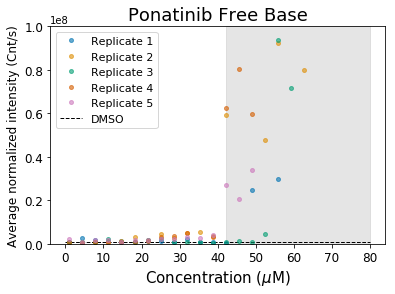

In [11]:
norm_int_array_1 = extract_normalized_intensity(DLS_data = df_read1, well_dictionary = ligands, ligand = "Ponatinib1" )
print("Normalized Intensity (Cnt/s)\n", norm_int_array_1)
norm_int_array_2 = extract_normalized_intensity(DLS_data = df_read1, well_dictionary = ligands, ligand = "Ponatinib2" )
print("Normalized Intensity (Cnt/s)\n", norm_int_array_2)
norm_int_array_3 = extract_normalized_intensity(DLS_data = df_read1, well_dictionary = ligands, ligand = "Ponatinib3" )
print("Normalized Intensity (Cnt/s)\n", norm_int_array_3)
norm_int_array_4 = extract_normalized_intensity(DLS_data = df_read1, well_dictionary = ligands, ligand = "Ponatinib4" )
print("Normalized Intensity (Cnt/s)\n", norm_int_array_4)
norm_int_array_5 = extract_normalized_intensity(DLS_data = df_read2, well_dictionary = ligands, ligand = "Ponatinib5" )
print("Normalized Intensity (Cnt/s)\n", norm_int_array_5)

plot = create_critical_aggrecation_concentration_plot(concentrations = conc_array, normalized_intensity_values_1 = norm_int_array_1, normalized_intensity_values_2 = norm_int_array_2, normalized_intensity_values_3 = norm_int_array_3, normalized_intensity_values_4 = norm_int_array_4, normalized_intensity_values_5 = norm_int_array_5, x = [42.2, 80], ligand_name = "Ponatinib Free Base")

pdf = PdfPages("20181105_kinase_inh_ponatinib_10^8_comparison_manual_settings_CAC.pdf")
pdf.savefig(plot)
    
pdf.close()

### Attempt to create a tidy PDF for comparison

In [ ]:
def create_CAC_grid_plot(concentrations, normalized_intensity_values, ligand_name, grid_x, grid_y):
    figure = plt.figure(figsize=(8.27, 11.69), dpi=100)
    plt.subplot2grid(grid_size, (grid_x, grid_y))
    plt.plot(concentrations, normalized_intensity_values, "o", alpha = 0.5)
    plt.xlabel("Concentration (uM)")
    plt.ylabel("Average normalized intensity (Cnt/s)")
    plt.ylim(0, 1e+8)
    plt.title(ligand_name)
    #plt.show()
    return(figure)